In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
import torch
from GPUtil import GPUtil

from utils import load_dataset, make_data, MyDataSet
from torch.utils.data import DataLoader
from pytorch_lighting_model.lighting_slice import model_encoder
from torch.utils.data import random_split
from pytorch_lightning.callbacks import ModelCheckpoint

import pytorch_lightning as pl

2023-05-22 13:48:53.443257: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:1')
<class 'torch.Tensor'> tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:1')


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


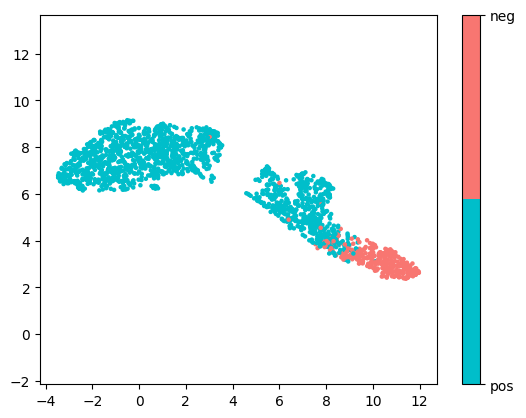

1
tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:1')
<class 'torch.Tensor'> tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:1')


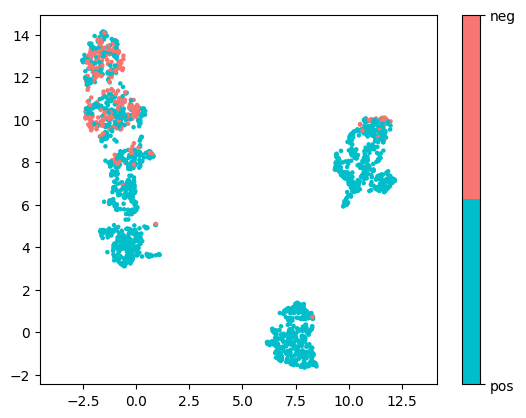

1
tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:1')
<class 'torch.Tensor'> tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:1')


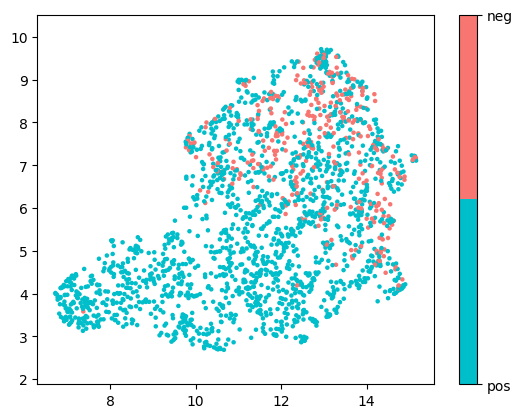

1
tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')
<class 'torch.Tensor'> tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')


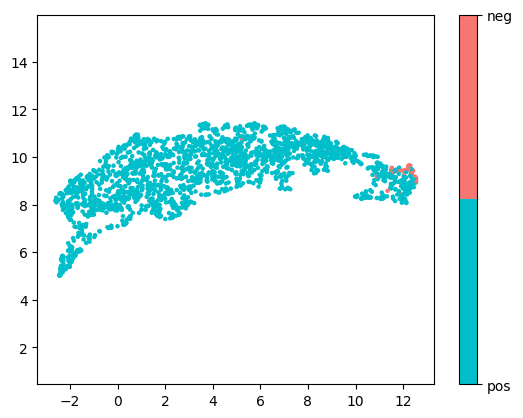

1
tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')
<class 'torch.Tensor'> tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')


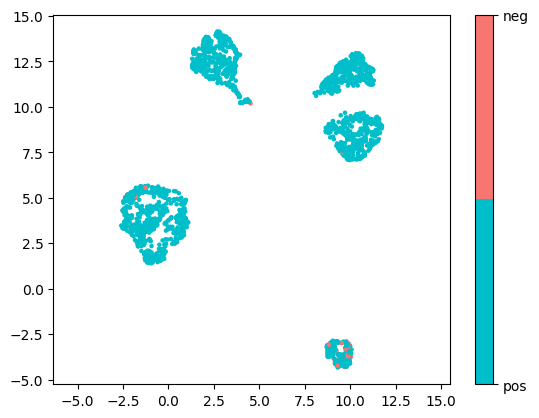

1
tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')
<class 'torch.Tensor'> tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')


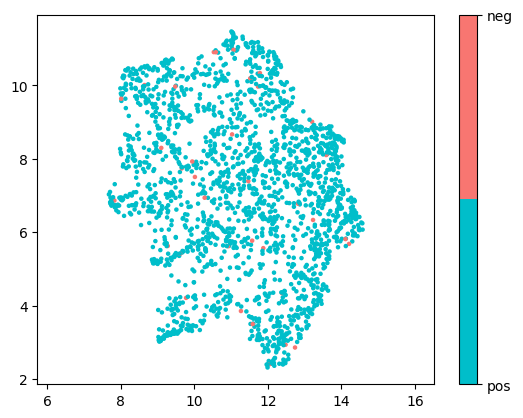

1
ok


In [3]:
def draw_umap(repres_list, label_list, m, d):
    # 配色、名称、坐标轴待统一样式修改
    # print(repres_list)
    # print(np.array(repres_list).shape)
    # fig=plt.figure()
    cmap = ListedColormap(['#00beca', '#f87671'])
    repres_list = repres_list.cpu()
    print(type(label_list), label_list)
    label_list = label_list.cpu()
    repres = np.array(repres_list)
    label = np.array(label_list)
    scaled_data = StandardScaler().fit_transform(repres)
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(scaled_data)
    colors = np.array(["#00beca", "#f87671"])
    # print(embedding)
    sc = plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=label, cmap=cmap, s=5
    )
    # l1, = plt.plot([], [], 'o', color='#00beca', label='positive')
    # l2, = plt.plot([], [], 'o', color='#f87671', label='negative')
    # global flag
    # if flag:
    #     plt.legend(bbox_to_anchor=(-0.15, 1.1), loc=1, borderaxespad=0)
    #     flag=False
    # plt.legend(loc='best')

    # fig, ax = plt.subplots()
    # # title = "The number of different protein residues(Train)"
    # ax.spines['right'].set_visible(False)
    # ax.spines['top'].set_visible(False)
    plt.gca().set_aspect('equal', 'datalim')

    cbar = plt.colorbar(sc, ticks=[0, 1])
    cbar.ax.set_yticklabels(['pos', 'neg'])  # horizontal colorbar

#     plt.title('UMAP projection', fontsize=24)
    plt.savefig('{}_{}_umap.svg'.format(m, d), format='svg')
    plt.show()
    return plt
reps = ['rep_rice_slice.pt', 'rep_rice_RNN.pt', 'rep_rice_BERT.pt', 'slice_tha_rep.pt', 'RNN_tha_rep.pt', 'BERT_tha_rep.pt']
lables = ['label_rice_slice.pt', 'label_rice_BERT.pt', 'label_rice_BERT.pt', 'slice_lable.pt', 'lable.pt', 'lable.pt']
for i, n in enumerate(reps):
    rep = torch.load(reps[i])
    lable = torch.load(lables[i])
    print(lable)
    model = ''
    data = 'tha'
    if i%3 == 0:
        model = 'slice'
    elif i%3 == 1:
        model = 'RNN'
    elif i%3 == 2:
        model = 'BERT'
    if i < 3:
        data = 'rice'
    plt = draw_umap(rep, lable, model, data)
    print('1')
print('ok')

<class 'torch.Tensor'> tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')


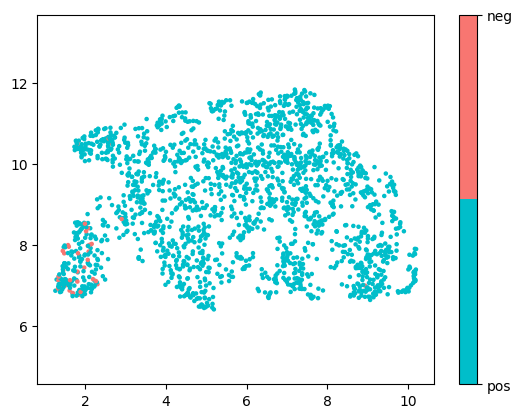

<module 'matplotlib.pyplot' from '/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [5]:
rep = "BERT_weight_tha_rep.pt"
lable = 'lable.pt'
rep = torch.load(rep)
lable = torch.load(lable)
model = 'BERT_weight'
data = 'tha'
draw_umap(rep, lable, model, data)

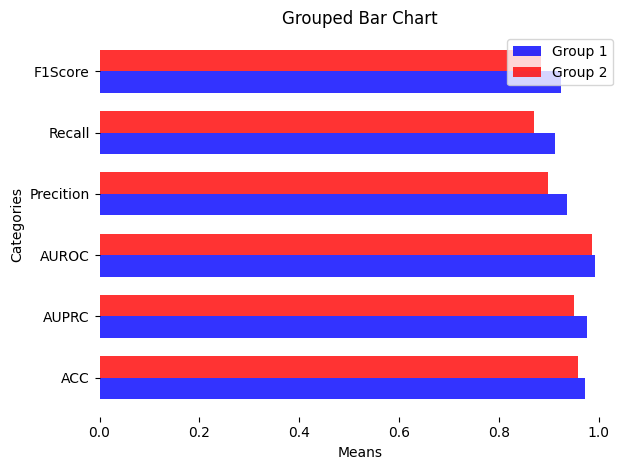

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 分组数据
categories = categories = ['ACC', 'AUPRC', 'AUROC', 'Precition', 'Recall', 'F1Score']   # 分组类别
group1_means = [0.9737,0.9766,0.9934,0.9371,0.9131,0.9254]  # 第一组的平均值
group2_means = [0.9594,0.9503,0.9867,0.8991,0.8703,0.8844]  # 第二组的平均值

# 设置条形图参数
bar_height = 0.35  # 条形高度
opacity = 0.8  # 不透明度

# 绘制条形图
index = np.arange(len(categories))  # y轴位置
fig, ax = plt.subplots()
rects1 = ax.barh(index, group1_means, bar_height,
                 alpha=opacity,
                 color='b',
                 label='Group 1')
rects2 = ax.barh(index + bar_height, group2_means, bar_height,
                 alpha=opacity,
                 color='r',
                 label='Group 2')

# 设置图表标签和标题
ax.set_ylabel('Categories')
ax.set_xlabel('Means')
ax.set_title('Grouped Bar Chart')
ax.set_yticks(index + bar_height / 2)
ax.set_yticklabels(categories)
ax.legend()

# 去掉坐标轴的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# 显示图表
plt.tight_layout()
plt.show()


/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


noContrast rice


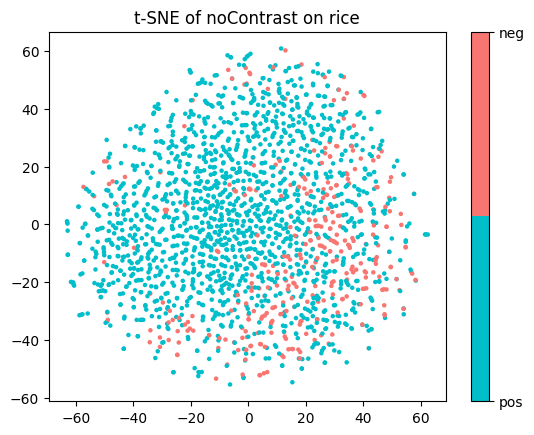

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
def draw_umap1(repres_list, label_list, model, data):
    cmap = ListedColormap(['#00beca', '#f87671'])
    repres_list = repres_list.cpu()
    label_list = label_list.cpu()
    repres = np.array(repres_list)
    label = np.array(label_list)
    scaled_data = StandardScaler().fit_transform(repres)
    tsne = TSNE(n_components=2, random_state=42)
    embedding = tsne.fit_transform(scaled_data)
    colors = np.array(["#00beca", "#f87671"])
    plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=label, cmap=cmap, s=5
    )
    cbar = plt.colorbar(ticks=[0, 1])
    cbar.ax.set_yticklabels(['pos', 'neg'])
    print(model, data)
    plt.title('t-SNE of {} on {}'.format(model, data))
    plt.savefig('{}_{}_tsne.svg'.format(model, data), format='svg')
    plt.savefig('{}_{}_tsne.png'.format(model, data), format='png')
    plt.show()

rep = torch.load('rep_rice_traditional1.pt')
label = torch.load('label_rice_slice.pt')
draw_umap1(rep, label, 'noContrast', 'rice')

/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/weilab/anaconda3/envs/jy2/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


noContrast tha


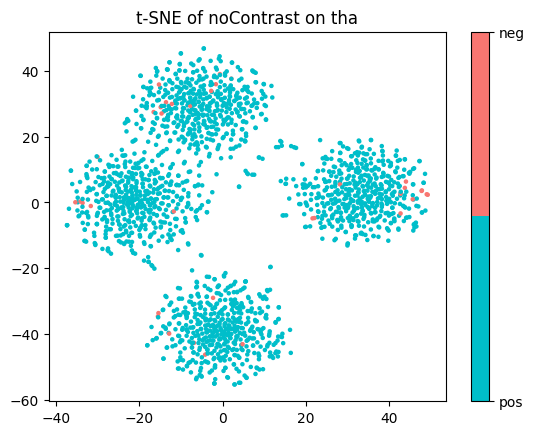

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
def draw_umap1(repres_list, label_list, model, data):
    cmap = ListedColormap(['#00beca', '#f87671'])
    repres_list = repres_list.cpu()
    label_list = label_list.cpu()
    repres = np.array(repres_list)
    label = np.array(label_list)
    scaled_data = StandardScaler().fit_transform(repres)
    tsne = TSNE(n_components=2, random_state=42)
    embedding = tsne.fit_transform(scaled_data)
    colors = np.array(["#00beca", "#f87671"])
    plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=label, cmap=cmap, s=5
    )
    cbar = plt.colorbar(ticks=[0, 1])
    cbar.ax.set_yticklabels(['pos', 'neg'])
    print(model, data)
    plt.title('t-SNE of {} on {}'.format(model, data))
    plt.savefig('{}_{}_tsne.svg'.format(model, data), format='svg')
    plt.savefig('{}_{}_tsne.png'.format(model, data), format='png')
    plt.show()

rep = torch.load('rep_noContrast_tha.pt')
label = torch.load('lable.pt')
draw_umap1(rep, label, 'noContrast', 'tha')